# Testing wEDE
Author: João Victor S. Rebouças, December 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camb
import sys, platform, os
import time
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# If you have many CAMB versions at your disposal, it's always useful to check which CAMB is being used.

Using CAMB 1.3.4 installed at /home/joaov/CAMB/CAMB-EDE/camb


In [2]:
# Energy density unit conversion
Mpc = 3.085678e22
c = 2.99792458e8
G = 6.6738e-11
kappa = 8 * np.pi * G
hplanck = 6.62606896e-34
hbar = hplanck/2/np.pi
Tpl = np.sqrt(kappa*hbar/c**5)
energyunitconversion = Mpc**2/(c**2 * Tpl**2)
# Potentials:
rocknroll = 1
axionede = 2

## Test case: simple w0wa

In [3]:
w0wacosmology = camb.set_params(# Background
                                thetastar = 0.0104, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                                # w0wa
                                dark_energy_model = 'fluid', w = -0.8, wa = 0,
                                # Neutrinos
                                omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                                nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                                # Initial Power Spectrum
                                As = 2.100549e-09, ns = 0.9660499, 
                                YHe = 0.246, WantTransfer=True)
w0waresults = camb.get_results(w0wacosmology)
scales = np.linspace(10**(-6),1, 200)
rhow_fid, wofa = w0waresults.get_dark_energy_rho_w(scales)
clsw0wa = w0waresults.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

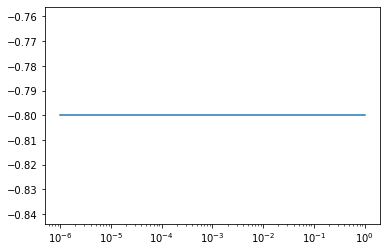

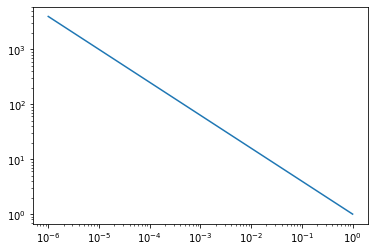

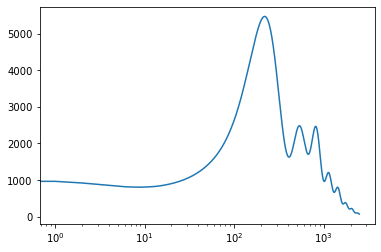

In [4]:
plt.plot(scales, wofa)
plt.xscale('log')
plt.show()
plt.plot(scales, rhow_fid)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(clsw0wa[2:])
plt.xscale('log')
plt.show()

## Now, testing my w0wa+EDE implementation

In [5]:
wedecosmology = camb.set_params(# Background
                                H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                                # wEDE
                                dark_energy_model = 'wEDEFluid', w_n = 1, w_const = -0.8, cs2_lam = 1,
                                zc = 3000, fde_zc = 0.0, wa = 0,
                                # Neutrinos
                                omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                                nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                                # Initial Power Spectrum
                                As = 2.100549e-09, ns = 0.9660499, 
                                YHe = 0.246, WantTransfer=True)
wederesults = camb.get_results(wedecosmology)
clsw0waede = wederesults.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

In [6]:
scales = np.linspace(10**(-6),1, 200)
rhode, wde = wederesults.get_dark_energy_rho_w(scales)
omega_de = wederesults.get_Omega('de', z = 1/scales - 1)
omega_rad = wederesults.get_Omega('photon', z = 1/scales - 1)

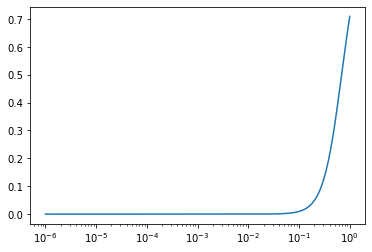

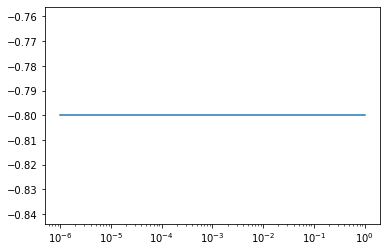

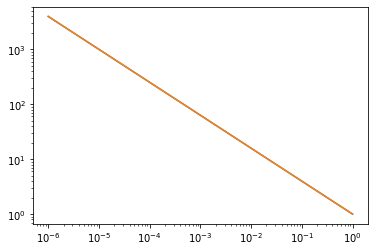

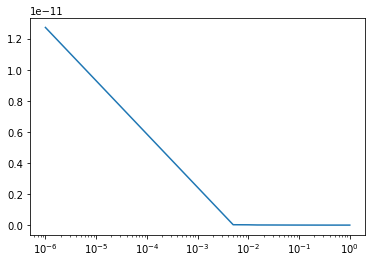

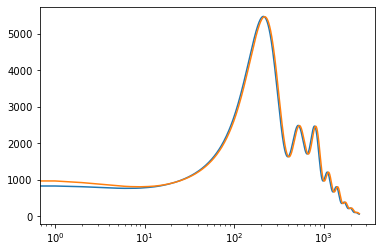

In [7]:
plt.plot(scales, omega_de)
plt.xscale('log')
plt.show()
plt.plot(scales, wde)
plt.xscale('log')
plt.show()
plt.plot(scales, rhode)
plt.plot(scales, rhow_fid)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(scales, rhode - rhow_fid)
plt.xscale('log')
plt.show()
plt.plot(clsw0waede[2:])
plt.plot(clsw0wa[2:])
plt.xscale('log')

In [8]:
print(clsw0wa)
print(clsw0waede)

[  0.           0.         999.20036699 ...  71.0922448   70.80376078
  70.51793925]
[  0.           0.         829.69682459 ...  57.08958663  57.02759498
  56.96836732]
